In [ ]:
!pip3 uninstall tensorflow-gpu==1.14
!pip3 install tensorflow==1.13.1
# !pip3 install tensorflow-gpu==1.14

In [ ]:
!pip3 install keras==2.0.8

     |████████████████████████████████| 276kB 4.2MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.8 which is incompatible.
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [ ]:
!pip3 install keras==2.2.4

  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Found existing installation: Keras 2.0.8
    Uninstalling Keras-2.0.8:
      Successfully uninstalled Keras-2.0.8


In [ ]:
import csv
from sklearn.model_selection import train_test_split
import numpy
import keras
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from keras.models import model_from_json
from numpy import loadtxt
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import seaborn as sns
sns.set()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [ ]:
# shuffled data

In [ ]:
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_1.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    Y1.append(Yd[i][0])
    Y2.append(Yd[i][1])
    Y3.append(Yd[i][2])
    Y4.append(Yd[i][3])
    Y5.append(Yd[i][4])
    Y6.append(Yd[i][5])
    Y7.append(Yd[i][6])
Xout = numpy.array(X)
Y1 = numpy.array(Y1)
Y2 = numpy.array(Y2)
Y3 = numpy.array(Y3)
Y4 = numpy.array(Y4)
Y5 = numpy.array(Y5)
Y6 = numpy.array(Y6)
Y7 = numpy.array(Y7)
print(Xout.shape)

(209715, 23)


In [ ]:
# shuffled data
visible = Input(shape=(23,))


c1 = Dense(23,activation='relu')(visible)
c2 = Dense(16,activation='relu')(c1)
s1 = Dense(1,activation='sigmoid')(c2)
s2 = Dense(1,activation='sigmoid')(c2)
s3 = Dense(1,activation='sigmoid')(c2)
s4 = Dense(1,activation='sigmoid')(c2)
s5 = Dense(1,activation='sigmoid')(c2)
s6 = Dense(1,activation='sigmoid')(c2)
s7 = Dense(1,activation='sigmoid')(c2)

model = Model(inputs=visible,outputs=[s1,s2,s3,s4,s5,s6,s7])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(Xout, y=[Y1,Y2,Y3,Y4,Y5,Y6,Y7], validation_split=0.2, epochs=5, batch_size=128)
print(model.summary())
model.save("/content/drive/MyDrive/shuffled_model_d1.h5")
print("Saved model to disk")

Train on 167772 samples, validate on 41943 samples
Epoch 1/5
167772/167772 [==============================] - 7s 44us/step - loss: 1.3518 - dense_42_loss: 0.1293 - dense_43_loss: 0.1658 - dense_44_loss: 0.1096 - dense_45_loss: 0.1225 - dense_46_loss: 0.2236 - dense_47_loss: 0.3493 - dense_48_loss: 0.2516 - dense_42_acc: 0.9445 - dense_43_acc: 0.9374 - dense_44_acc: 0.9544 - dense_45_acc: 0.9695 - dense_46_acc: 0.9163 - dense_47_acc: 0.8517 - dense_48_acc: 0.8874 - val_loss: 0.6145 - val_dense_42_loss: 0.0318 - val_dense_43_loss: 0.0592 - val_dense_44_loss: 0.0253 - val_dense_45_loss: 0.0397 - val_dense_46_loss: 0.0619 - val_dense_47_loss: 0.3008 - val_dense_48_loss: 0.0958 - val_dense_42_acc: 0.9886 - val_dense_43_acc: 0.9796 - val_dense_44_acc: 0.9902 - val_dense_45_acc: 0.9862 - val_dense_46_acc: 0.9837 - val_dense_47_acc: 0.8595 - val_dense_48_acc: 0.9681
Epoch 2/5
167772/167772 [==============================] - 5s 28us/step - loss: 0.5060 - dense_42_loss: 0.0264 - dense_43_loss: 0

In [ ]:
# data 2
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_2.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    Y1.append(Yd[i][0])
    Y2.append(Yd[i][1])
    Y3.append(Yd[i][2])
    Y4.append(Yd[i][3])
    Y5.append(Yd[i][4])
    Y6.append(Yd[i][5])
    Y7.append(Yd[i][6])
Xout = numpy.array(X)
Y1 = numpy.array(Y1)
Y2 = numpy.array(Y2)
Y3 = numpy.array(Y3)
Y4 = numpy.array(Y4)
Y5 = numpy.array(Y5)
Y6 = numpy.array(Y6)
Y7 = numpy.array(Y7)
print(Xout.shape)

(209715, 23)


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/shuffled_model_d1.h5')
history=model.fit(Xout, y=[Y1,Y2,Y3,Y4,Y5,Y6,Y7], validation_split=0.2, epochs=5, batch_size=128)
print(model.summary())
model.save("/content/drive/MyDrive/shuffled_model_d2.h5")
print("Saved model to disk")

Train on 167772 samples, validate on 41943 samples
Epoch 1/5
167772/167772 [==============================] - 6s 39us/step - loss: 0.1976 - dense_42_loss: 0.0095 - dense_43_loss: 0.0256 - dense_44_loss: 0.0118 - dense_45_loss: 0.0194 - dense_46_loss: 0.0159 - dense_47_loss: 0.0665 - dense_48_loss: 0.0489 - dense_42_acc: 0.9986 - dense_43_acc: 0.9884 - dense_44_acc: 0.9943 - dense_45_acc: 0.9879 - dense_46_acc: 0.9930 - dense_47_acc: 0.9722 - dense_48_acc: 0.9790 - val_loss: 0.2015 - val_dense_42_loss: 0.0088 - val_dense_43_loss: 0.0259 - val_dense_44_loss: 0.0114 - val_dense_45_loss: 0.0186 - val_dense_46_loss: 0.0151 - val_dense_47_loss: 0.0701 - val_dense_48_loss: 0.0517 - val_dense_42_acc: 0.9990 - val_dense_43_acc: 0.9890 - val_dense_44_acc: 0.9953 - val_dense_45_acc: 0.9894 - val_dense_46_acc: 0.9937 - val_dense_47_acc: 0.9722 - val_dense_48_acc: 0.9764
Epoch 2/5
167772/167772 [==============================] - 5s 28us/step - loss: 0.1812 - dense_42_loss: 0.0082 - dense_43_loss: 0

In [ ]:
# data 3
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_3.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    Y1.append(Yd[i][0])
    Y2.append(Yd[i][1])
    Y3.append(Yd[i][2])
    Y4.append(Yd[i][3])
    Y5.append(Yd[i][4])
    Y6.append(Yd[i][5])
    Y7.append(Yd[i][6])
Xout = numpy.array(X)
Y1 = numpy.array(Y1)
Y2 = numpy.array(Y2)
Y3 = numpy.array(Y3)
Y4 = numpy.array(Y4)
Y5 = numpy.array(Y5)
Y6 = numpy.array(Y6)
Y7 = numpy.array(Y7)
print(Xout.shape)

(209715, 23)


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/shuffled_model_d2.h5')
history=model.fit(Xout, y=[Y1,Y2,Y3,Y4,Y5,Y6,Y7], validation_split=0.2, epochs=5, batch_size=128)
print(model.summary())
model.save("/content/drive/MyDrive/shuffled_model_d3.h5")
print("Saved model to disk")

Train on 167772 samples, validate on 41943 samples
Epoch 1/5
167772/167772 [==============================] - 7s 43us/step - loss: 0.1249 - dense_42_loss: 0.0048 - dense_43_loss: 0.0184 - dense_44_loss: 0.0051 - dense_45_loss: 0.0136 - dense_46_loss: 0.0125 - dense_47_loss: 0.0405 - dense_48_loss: 0.0300 - dense_42_acc: 0.9993 - dense_43_acc: 0.9930 - dense_44_acc: 0.9994 - dense_45_acc: 0.9929 - dense_46_acc: 0.9941 - dense_47_acc: 0.9843 - dense_48_acc: 0.9886 - val_loss: 0.1228 - val_dense_42_loss: 0.0043 - val_dense_43_loss: 0.0213 - val_dense_44_loss: 0.0045 - val_dense_45_loss: 0.0123 - val_dense_46_loss: 0.0140 - val_dense_47_loss: 0.0391 - val_dense_48_loss: 0.0272 - val_dense_42_acc: 0.9990 - val_dense_43_acc: 0.9885 - val_dense_44_acc: 0.9994 - val_dense_45_acc: 0.9926 - val_dense_46_acc: 0.9926 - val_dense_47_acc: 0.9879 - val_dense_48_acc: 0.9885
Epoch 2/5
167772/167772 [==============================] - 5s 31us/step - loss: 0.1087 - dense_42_loss: 0.0044 - dense_43_loss: 0

In [ ]:
# data 4
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_4.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    Y1.append(Yd[i][0])
    Y2.append(Yd[i][1])
    Y3.append(Yd[i][2])
    Y4.append(Yd[i][3])
    Y5.append(Yd[i][4])
    Y6.append(Yd[i][5])
    Y7.append(Yd[i][6])
Xout = numpy.array(X)
Y1 = numpy.array(Y1)
Y2 = numpy.array(Y2)
Y3 = numpy.array(Y3)
Y4 = numpy.array(Y4)
Y5 = numpy.array(Y5)
Y6 = numpy.array(Y6)
Y7 = numpy.array(Y7)
print(Xout.shape)

(209715, 23)


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/shuffled_model_d3.h5')
history=model.fit(Xout, y=[Y1,Y2,Y3,Y4,Y5,Y6,Y7], validation_split=0.2, epochs=5, batch_size=128)
print(model.summary())
model.save("/content/drive/MyDrive/shuffled_model_d4.h5")
print("Saved model to disk")

Train on 167772 samples, validate on 41943 samples
Epoch 1/5
167772/167772 [==============================] - 8s 47us/step - loss: 0.0602 - dense_42_loss: 0.0025 - dense_43_loss: 0.0121 - dense_44_loss: 0.0011 - dense_45_loss: 0.0057 - dense_46_loss: 0.0101 - dense_47_loss: 0.0170 - dense_48_loss: 0.0118 - dense_42_acc: 0.9996 - dense_43_acc: 0.9979 - dense_44_acc: 1.0000 - dense_45_acc: 0.9989 - dense_46_acc: 0.9956 - dense_47_acc: 0.9966 - dense_48_acc: 0.9982 - val_loss: 0.0535 - val_dense_42_loss: 0.0025 - val_dense_43_loss: 0.0107 - val_dense_44_loss: 9.8625e-04 - val_dense_45_loss: 0.0048 - val_dense_46_loss: 0.0101 - val_dense_47_loss: 0.0154 - val_dense_48_loss: 0.0090 - val_dense_42_acc: 0.9995 - val_dense_43_acc: 0.9996 - val_dense_44_acc: 1.0000 - val_dense_45_acc: 0.9993 - val_dense_46_acc: 0.9958 - val_dense_47_acc: 0.9964 - val_dense_48_acc: 0.9984
Epoch 2/5
167772/167772 [==============================] - 6s 33us/step - loss: 0.0514 - dense_42_loss: 0.0020 - dense_43_los

In [ ]:
# test
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_5.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    Y1.append(Yd[i][0])
    Y2.append(Yd[i][1])
    Y3.append(Yd[i][2])
    Y4.append(Yd[i][3])
    Y5.append(Yd[i][4])
    Y6.append(Yd[i][5])
    Y7.append(Yd[i][6])
Xout = numpy.array(X)
Y1 = numpy.array(Y1)
Y2 = numpy.array(Y2)
Y3 = numpy.array(Y3)
Y4 = numpy.array(Y4)
Y5 = numpy.array(Y5)
Y6 = numpy.array(Y6)
Y7 = numpy.array(Y7)
print(Xout.shape)

(209715, 23)


In [ ]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/shuffled_model_d4.h5')
score = loaded_model.evaluate(Xout, y=[Y1,Y2,Y3,Y4,Y5,Y6,Y7], verbose=0)
for i in range(0,len(score)):
    print("%s: %.2f%%" % (loaded_model.metrics_names[i], score[i]*100))

predicted = loaded_model.predict(Xout)
p_classes = numpy.argmax(predicted,axis=1)

loss: 3.13%
dense_42_loss: 0.11%
dense_43_loss: 0.63%
dense_44_loss: 0.03%
dense_45_loss: 0.17%
dense_46_loss: 0.80%
dense_47_loss: 0.92%
dense_48_loss: 0.49%
dense_42_acc: 99.99%
dense_43_acc: 99.92%
dense_44_acc: 100.00%
dense_45_acc: 99.99%
dense_46_acc: 99.77%
dense_47_acc: 99.76%
dense_48_acc: 99.87%


In [ ]:
p = []

for x in numpy.nditer(predicted):
    xi = []
    for i in range(0,7):

        if x[i] < float(0.5):
            xi.append(0.0)
        else:
            xi.append(1.0)
    p.append(xi)

count = 0
for i in range(0,len(Yd)):
    v = 1
    for j in range(0,len(Yd[i])):
        if Yd[i][j]!=p[i][j]:
            v = 0
            break
    if v==1:
        count+=1

print(count)
print((count/len(Yd))*100)

#print(history.history.keys())


208749
99.53937486588941


summarize history for dense_3 layer


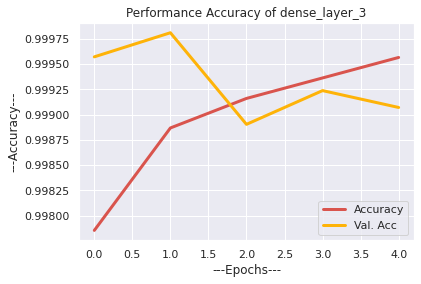

In [ ]:
%matplotlib inline
print("summarize history for dense_3 layer")
# accuracy
plt.plot(history.history['dense_43_acc'],sns.xkcd_rgb["pale red"],label="Accuracy", lw=3)
plt.plot(history.history['val_dense_43_acc'],sns.xkcd_rgb["amber"], label="Val. Acc", lw=3)
#plt.yticks(numpy.arange(ymin, ymax, 0.005))
plt.title('Performance Accuracy of dense_layer_3')
plt.ylabel('---Accuracy---')
plt.xlabel('---Epochs---')
plt.legend()
plt.savefig('/content/drive/MyDrive/dense_3_acc.png')
plt.show()

In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import pandas as pd
import numpy as np


In [ ]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/shuffled_model_d4.h5')

loss


Accuracy: 0.999914
Precision: 0.999914
Recall: 0.999914
F1 score: 0.999914
Cohens kappa: 0.999810
[[ 72482      0]
 [    18 137215]]
Predicted    0.0     1.0     All
Actual                          
0.0        72482       0   72482
1.0           18  137215  137233
All        72500  137215  209715







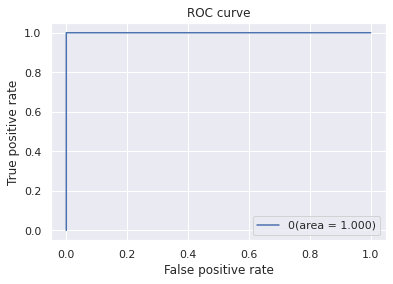

dense_42_loss


Accuracy: 0.999242
Precision: 0.999242
Recall: 0.999242
F1 score: 0.999242
Cohens kappa: 0.998483
[[103663    155]
 [     4 105893]]
Predicted     0.0     1.0     All
Actual                           
0.0        103663     155  103818
1.0             4  105893  105897
All        103667  106048  209715







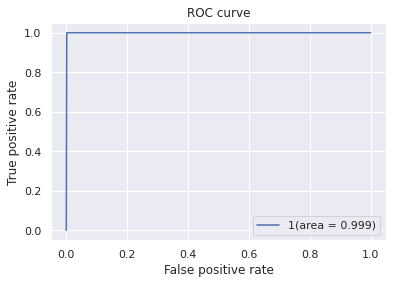

dense_43_loss


Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
Cohens kappa: 1.000000
[[159812      0]
 [     0  49903]]
Predicted     0.0    1.0     All
Actual                          
0.0        159812      0  159812
1.0             0  49903   49903
All        159812  49903  209715







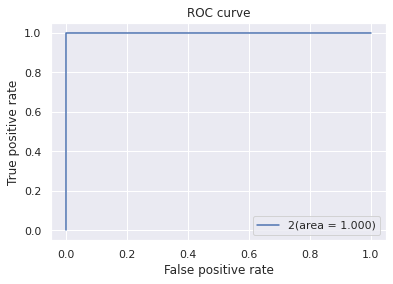

dense_44_loss


Accuracy: 0.999919
Precision: 0.999919
Recall: 0.999919
F1 score: 0.999919
Cohens kappa: 0.999834
[[121575      0]
 [    17  88123]]
Predicted     0.0    1.0     All
Actual                          
0.0        121575      0  121575
1.0            17  88123   88140
All        121592  88123  209715







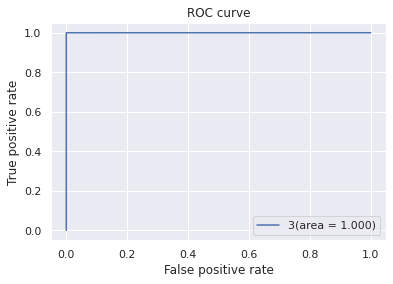

dense_45_loss


Accuracy: 0.997735
Precision: 0.997735
Recall: 0.997735
F1 score: 0.997735
Cohens kappa: 0.993132
[[165797     49]
 [   426  43443]]
Predicted     0.0    1.0     All
Actual                          
0.0        165797     49  165846
1.0           426  43443   43869
All        166223  43492  209715







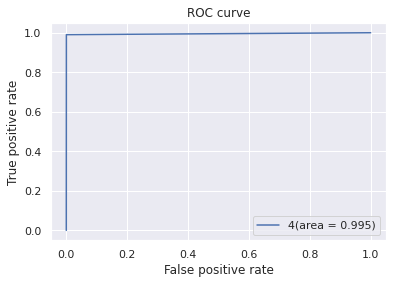

dense_46_loss


Accuracy: 0.997606
Precision: 0.997606
Recall: 0.997606
F1 score: 0.997606
Cohens kappa: 0.990816
[[177156    334]
 [   168  32057]]
Predicted     0.0    1.0     All
Actual                          
0.0        177156    334  177490
1.0           168  32057   32225
All        177324  32391  209715







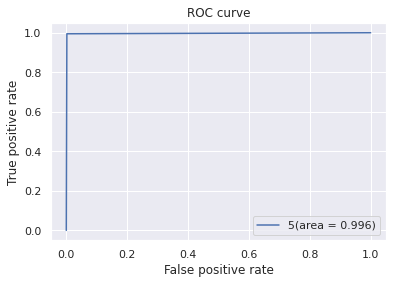

dense_47_loss


Accuracy: 0.998708
Precision: 0.998708
Recall: 0.998708
F1 score: 0.998708
Cohens kappa: 0.997399
[[113133    256]
 [    15  96311]]
Predicted     0.0    1.0     All
Actual                          
0.0        113133    256  113389
1.0            15  96311   96326
All        113148  96567  209715







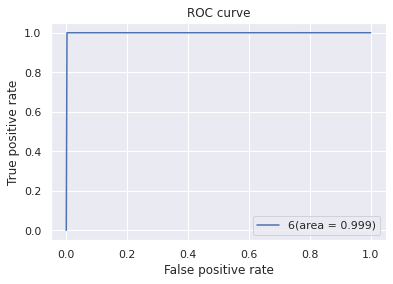

In [ ]:
%matplotlib inline

for j in range(0,7):
    Yt_1=[]
    p_1=[]    
    
    for i in range(0,len(Yd)):
        Yt_1.append(Yd[i][j])
        if(p[i][j]<0.5):
          p_1.append(0.0)
        else:
          p_1.append(1.0)
        # p_1.append(np.argmax(p[i][j],axis=1))

    
    # plt.scatter(Yt_1,p_1)
    # plt.xlabel("True")
    # plt.ylabel("Predict")
    # print(Yt_1)
    # print(p_1)
    print(loaded_model.metrics_names[j])
    print("\n")
    accuracy = accuracy_score(Yt_1, p_1)
    print('Accuracy: %f' % accuracy)

    # precision tp / (tp + fp)
    precision = precision_score(Yt_1, p_1, average='micro')
    print('Precision: %f' % precision)

    # recall: tp / (tp + fn)
    recall = recall_score(Yt_1, p_1, average='micro')
    print('Recall: %f' % recall)

    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(Yt_1, p_1, average='micro')
    print('F1 score: %f' % f1)

    # kappa
    kappa = cohen_kappa_score(Yt_1, p_1)
    print('Cohens kappa: %f' % kappa)

    # ROC AUC
    # auc = roc_auc_score(Yt_1, p_1)
    # print('ROC AUC: %f' % auc)
    
    fp, tp, thresholds_keras = roc_curve(Yt_1,p_1)
    
    auc_rf = auc(fp,tp)
    plt.plot(fp,tp,label=str(j)+"(area = {:.3f})".format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

    # confusion matrix
    matrix = confusion_matrix(Yt_1, p_1)
    print(matrix)

    exp_series = pd.Series(Yt_1)
    pred_series = pd.Series(p_1)
    print(pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print("\n\n\n\n")
    plt.savefig('/content/drive/MyDrive/ROC'+str(j)+'.png')
    plt.show()
    